
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Extended Data Figure 2
-----

In [1]:
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.patches as patches
import seaborn as sns

import os
import sys

genome_size = 2897.310462
import warnings
warnings.filterwarnings('ignore')

-----
##### Set up input / output directories

In [2]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [3]:
sys.path.append(str(root_dir))
import scripts.utils as ut

-----
##### Load & prepare data 

In [ ]:
## Load patients metadata
kzm_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.txt'), sep='\t', index_col=0)
low_samples = kzm_md[kzm_md.Burden=='low'].index.tolist()

In [5]:
drivers = pd.read_csv('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/source_data/KZM611_vep_drivers_all_exact_clean_4SuppTable.txt', sep='\t')
drivers.head()

,Hugo_Symbol,Entrez_Gene_Id,HGNC_ID,NCBI_Build,Chromosome,Start_Position,End_Position,GENOMIC_WT_ALLELE,GENOMIC_MUT_ALLELE,Strand,...,Gene,ENSP,CANONICAL,CCDS,Recurrence_in_COSMIC,Sample_ID,Source,Burden,State,Trinuc
0,ACVR1,90,171,GRCh37,2,158622516,158622516,C,T,+,...,ENSG00000115170,ENSP00000263640,YES,CCDS2206.1,21.0,zcc1,"CGI,COSMIC,oncoKB",low,Primary-Naive,C[C>T]C
1,ACVR1,90,171,GRCh37,2,158622516,158622516,C,T,+,...,ENSG00000115170,ENSP00000263640,YES,CCDS2206.1,21.0,zcc135,"CGI,COSMIC,oncoKB",low,Primary-Naive,C[C>T]C
2,ACVR1,90,171,GRCh37,2,158622516,158622516,C,T,+,...,ENSG00000115170,ENSP00000263640,YES,CCDS2206.1,21.0,zcc206,"CGI,COSMIC,oncoKB",low,Primary-Naive,C[C>T]C
3,ACVR1,90,171,GRCh37,2,158630626,158630626,C,T,+,...,ENSG00000115170,ENSP00000263640,YES,CCDS2206.1,20.0,zcc165,"CGI,COSMIC,oncoKB",low,Primary-Naive,G[C>T]G
4,ACVR1,90,171,GRCh37,2,158622516,158622516,C,A,+,...,ENSG00000115170,ENSP00000263640,YES,CCDS2206.1,24.0,zcc241,"CGI,COSMIC,oncoKB",low,Primary-Naive,C[C>A]C


-----
## Panel a

In [7]:
all_genes_df = ut.get_drivers_mat(drivers, kzm_md, 'Sample_ID')

(641, 28)


In [8]:
def build_cm_2col(t1, t2):
    colors = [(1, 1, 1)]
    colors.append(tuple([x/256 for x in t1]))
    colors.append(tuple([x/256 for x in t2]))
    n_bins = 80  # Discretizes the interpolation into bins
    cmap_name = 'my_list'
    return mc.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

def build_cm_1col(t1):
    colors = [(1, 1, 1)]
    colors.append(tuple([x/256 for x in t1]))
    n_bins = 20  # Discretizes the interpolation into bins
    cmap_name = 'my_list'
    return mc.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

In [9]:
cm1 = build_cm_1col((49,54,149))
cm2 = build_cm_1col((165,0,38))

In [10]:
all_genes_2plus = all_genes_df[all_genes_df.Total>2].copy()
all_genes_2plus.columns = [x.replace('-', '\n') if '-' in x else x for x in all_genes_2plus.columns]
all_genes_2p_thr = all_genes_2plus.copy()
all_genes_2p_thr['pret'] = all_genes_2p_thr['Primary\nNaive'] + all_genes_2p_thr['Advanced\nNaive']
all_genes_2p_thr['post'] = all_genes_2p_thr['Primary\nTreated'] + all_genes_2p_thr['Advanced\nTreated']
all_genes_2p_thr.head(3)

,Primary\nNaive,Primary\nTreated,Advanced\nNaive,Advanced\nTreated,Total,Percentage,pret,post
TP53,48,8,1,27,84,14.0,49,35
KMT2C,11,4,0,18,33,5.0,11,22
PABPC1,9,6,0,11,26,4.0,9,17


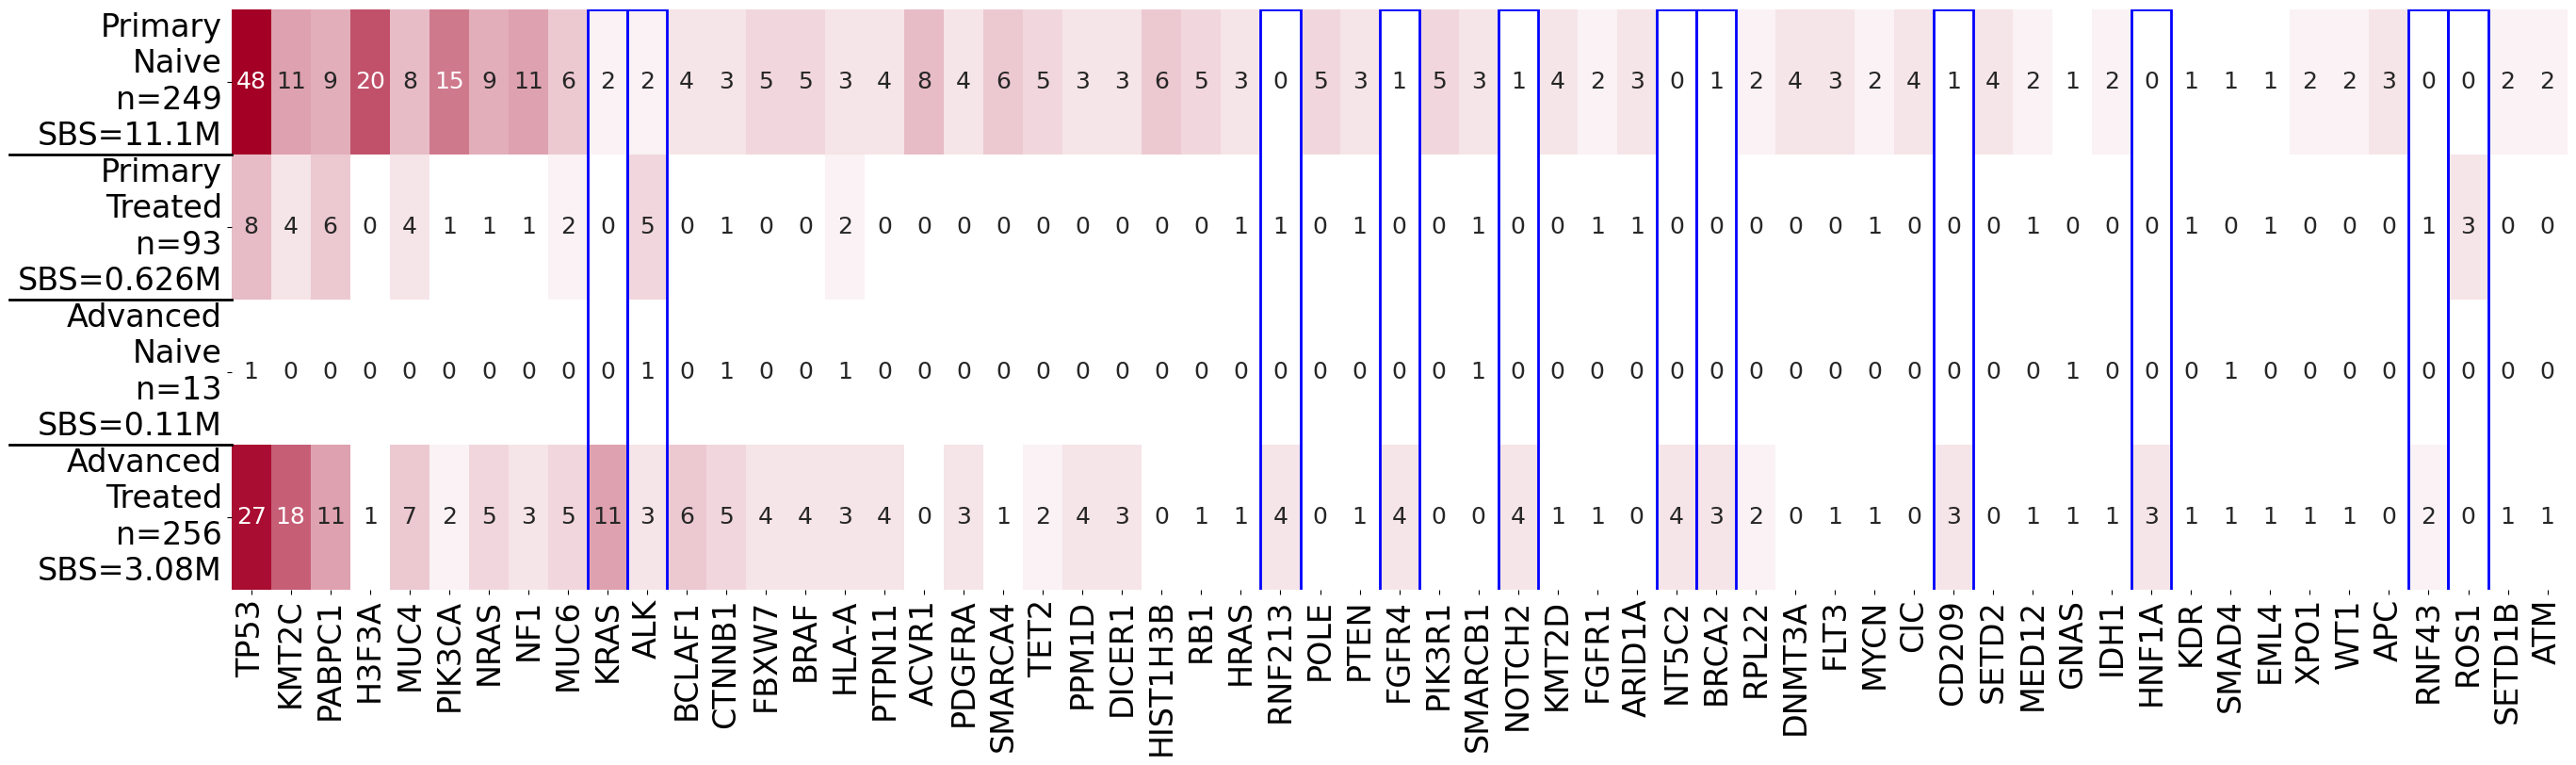

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

f, axes = plt.subplots(figsize=(32,8))

all_genes_2plus_2plot = all_genes_2plus.iloc[:, 0:4].copy()
all_genes_2plus_2plot.columns = [
    'Primary\nNaive\nn=249\nSBS=11.1M',
    'Primary\nTreated\nn=93\nSBS=0.626M',
    'Advanced\nNaive\nn=13\nSBS=0.11M',
    'Advanced\nTreated\nn=256\nSBS=3.08M'
]

ax = sns.heatmap(
    all_genes_2plus_2plot.T,
    cmap=cm2,
    vmax=29,
    cbar=False,
    annot=True,
    annot_kws={"fontsize":18}
)

# Highlight specific columns if desired
for i in range(all_genes_2plus_2plot.shape[0]):
    if (all_genes_2plus_2plot.iloc[i, 1] + all_genes_2plus_2plot.iloc[i, 3]) / \
       (all_genes_2plus_2plot.iloc[i, 0] + all_genes_2plus_2plot.iloc[i, 2]) > 2:
        rect = patches.Rectangle((i, 0), 1, 5, linewidth=2, edgecolor='b', facecolor='none')
        ax.add_patch(rect)

plt.xticks(fontsize=24, rotation=90)
plt.yticks(fontsize=24, rotation=0)

# --- Add horizontal separator lines outside the plot (between y-axis labels) ---
yticks = ax.get_yticks()
for y in yticks[:-1]:  # skip the last one
    f.canvas.draw()  # ensure positions are known
    # draw a short horizontal line just to the left of y-tick labels
    ax.plot(
        [0, -0.095], [y+0.5, y+0.5],  # small segment (in axes fraction)
        transform=ax.get_yaxis_transform(),
        color='black', linewidth=2, clip_on=False
    )

#plt.savefig(os.path.join(fig_out, 'ExFig_2b_rev.pdf'), bbox_inches="tight", dpi=300)

-----
## Panel b

In [12]:
rel_counts_low, abs_counts_low = ut.get_drivers_type_state(drivers, kzm_md, burden='low')
rel_counts_all, abs_counts_all = ut.get_drivers_type_state(drivers, kzm_md)

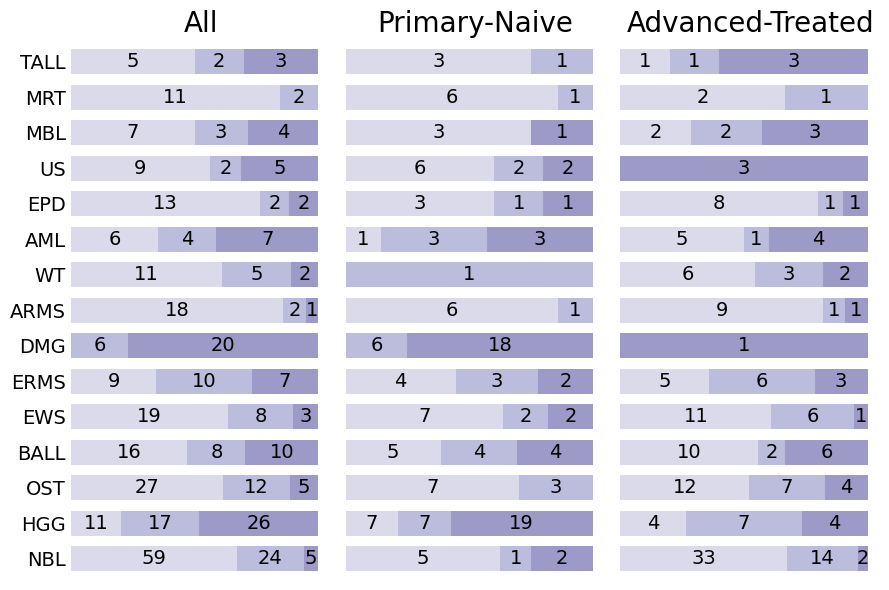

In [13]:
tab20c_cols = sns.color_palette("tab20c")
mycolors = tab20c_cols[-7:-4][::-1]

nrows = 1
ncols = 3

f, axes = plt.subplots(nrows, ncols, figsize=(9,6), sharey=True)

ax0 = rel_counts_all[rel_counts_all.Condition=='All'].drop(['Condition'], axis=1).set_index('Type').plot.barh(stacked=True, color=mycolors, title='All', width=0.7, ax=axes[0])
ax0.set_title('All', fontsize=20)
for sp in ax0.spines:
    ax0.spines[sp].set_visible(False)
ax0.tick_params(axis=u'both', which=u'both',length=0, labelsize=14)
#ax0.tick_params(axis='x', labelsize=20)
ax0.xaxis.set_ticklabels([])
ax0.get_legend().remove()
labels2 = [f'{int(i)}' for i in abs_counts_all[abs_counts_all.Condition=='All'].drop(['Condition'], axis=1).set_index('Type').to_numpy().flatten(order='F')]
for i, patch in enumerate(ax0.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    if int(labels2[i]) > 0:
        ax0.annotate(labels2[i], (x, y), ha='center', va='center', c='black', fontsize=14)
ax0.set_ylabel('')

ax1 = rel_counts_all[rel_counts_all.Condition=='Primary-Naive'].drop(['Condition'], axis=1).set_index('Type').plot.barh(stacked=True, color=mycolors, title='Primary-Naive', width=0.7, ax=axes[1])
ax1.set_title('Primary-Naive', fontsize=20)
for sp in ax1.spines:
    ax1.spines[sp].set_visible(False)
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.xaxis.set_ticklabels([])
ax1.get_legend().remove()
ax1.yaxis.label.set_size(40)
labels2 = [f'{int(i)}' for i in abs_counts_all[abs_counts_all.Condition=='Primary-Naive'].drop(['Condition'], axis=1).set_index('Type').to_numpy().flatten(order='F')]
for i, patch in enumerate(ax1.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    if int(labels2[i]) > 0:
        ax1.annotate(labels2[i], (x, y), ha='center', va='center', c='black', fontsize=14)

ax4 = rel_counts_all[rel_counts_all.Condition=='Advanced-Treated'].drop(['Condition'], axis=1).set_index('Type').plot.barh(stacked=True, color=mycolors, title='Advanced-Treated', width=0.7, ax=axes[2])
ax4.set_title('Advanced-Treated', fontsize=20)
for sp in ax4.spines:
    ax4.spines[sp].set_visible(False)
ax4.tick_params(axis=u'both', which=u'both',length=0)
ax4.xaxis.set_ticklabels([])
ax4.get_legend().remove()
labels2 = [f'{int(i)}' for i in abs_counts_all[abs_counts_all.Condition=='Advanced-Treated'].drop(['Condition'], axis=1).set_index('Type').to_numpy().flatten(order='F')]
for i, patch in enumerate(ax4.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    if int(labels2[i]) > 0:
        ax4.annotate(labels2[i], (x, y), ha='center', va='center', c='black', fontsize=14)


plt.tight_layout()
#plt.savefig(os.path.join(fig_out, 'ExFig_2cAll_rev.pdf'), bbox_inches="tight")


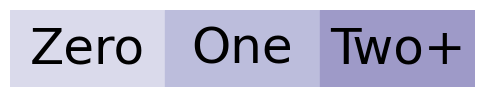

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tab20c_cols = sns.color_palette("tab20c")
mycolors = tab20c_cols[-7:-4][::-1]

labels = ['Zero', 'One', 'Two+']

fig, ax = plt.subplots(figsize=(6, 1))
for i, (c, label) in enumerate(zip(mycolors, labels)):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=c))
    ax.text(i + 0.5, 0.8, label, ha='center', va='top', fontsize=36)

ax.set_xlim(0, 3)
ax.set_ylim(0, 1)
ax.axis('off')
plt.savefig(os.path.join(fig_out, 'ExFig_2c_leg_rev.pdf'), bbox_inches="tight")
